In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

/var/folders/_f/ngf9qz9544j6572y7p_sddyw0000gn/T/ipykernel_81692/2625195485.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [4]:
data = pd.read_csv('tripadvisor_hotel_reviews.csv')
data.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [5]:
data['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

### Exploratory Data Analysis

Counts and Length:
    Start by checking how long the reviews are

Character count

Word count

Mean word length

Mean sentence length

In [6]:
lenght = len(data['Review'][0])
print(f'Length of a sample review: {lenght}')

Length of a sample review: 593


In [7]:
data['Length'] = data['Review'].str.len()
data.head(10)

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281
5,love monaco staff husband stayed hotel crazy w...,5,1002
6,"cozy stay rainy city, husband spent 7 nights m...",5,748
7,"excellent staff, housekeeping quality hotel ch...",4,597
8,"hotel stayed hotel monaco cruise, rooms genero...",5,419
9,excellent stayed hotel monaco past w/e delight...,5,271


In [8]:
word_count = data['Review'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 87


In [9]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

In [10]:
data['Word_count'] = data['Review'].apply(word_count)
data.head(10)

,Review,Rating,Length,Word_count
0,nice hotel expensive parking got good deal sta...,4,593,87
1,ok nothing special charge diamond member hilto...,2,1689,250
2,nice rooms not 4* experience hotel monaco seat...,3,1427,217
3,"unique, great stay, wonderful time hotel monac...",5,600,89
4,"great stay great stay, went seahawk game aweso...",5,1281,191
5,love monaco staff husband stayed hotel crazy w...,5,1002,134
6,"cozy stay rainy city, husband spent 7 nights m...",5,748,101
7,"excellent staff, housekeeping quality hotel ch...",4,597,85
8,"hotel stayed hotel monaco cruise, rooms genero...",5,419,59
9,excellent stayed hotel monaco past w/e delight...,5,271,35


Mean word length: Average length of words

In [11]:
data['mean_word_length'] = data['Review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.head(10)

,Review,Rating,Length,Word_count,mean_word_length
0,nice hotel expensive parking got good deal sta...,4,593,87,5.804598
1,ok nothing special charge diamond member hilto...,2,1689,250,5.752000
2,nice rooms not 4* experience hotel monaco seat...,3,1427,217,5.571429
3,"unique, great stay, wonderful time hotel monac...",5,600,89,5.730337
4,"great stay great stay, went seahawk game aweso...",5,1281,191,5.701571
5,love monaco staff husband stayed hotel crazy w...,5,1002,134,6.470149
6,"cozy stay rainy city, husband spent 7 nights m...",5,748,101,6.396040
7,"excellent staff, housekeeping quality hotel ch...",4,597,85,6.011765
8,"hotel stayed hotel monaco cruise, rooms genero...",5,419,59,6.084746
9,excellent stayed hotel monaco past w/e delight...,5,271,35,6.714286


Mean sentence length: Average length of the sentences in the review

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bhanuswami/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
np.mean([len(sent) for sent in tokenize.sent_tokenize(data['Review'][0])])

591.0

In [14]:
data['mean_sent_length'] = data['Review'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
data.head(10)

,Review,Rating,Length,Word_count,mean_word_length,mean_sent_length
0,nice hotel expensive parking got good deal sta...,4,593,87,5.804598,591.0
1,ok nothing special charge diamond member hilto...,2,1689,250,5.752000,1687.0
2,nice rooms not 4* experience hotel monaco seat...,3,1427,217,5.571429,712.0
3,"unique, great stay, wonderful time hotel monac...",5,600,89,5.730337,598.0
4,"great stay great stay, went seahawk game aweso...",5,1281,191,5.701571,1279.0
5,love monaco staff husband stayed hotel crazy w...,5,1002,134,6.470149,1000.0
6,"cozy stay rainy city, husband spent 7 nights m...",5,748,101,6.396040,746.0
7,"excellent staff, housekeeping quality hotel ch...",4,597,85,6.011765,595.0
8,"hotel stayed hotel monaco cruise, rooms genero...",5,419,59,6.084746,417.0
9,excellent stayed hotel monaco past w/e delight...,5,271,35,6.714286,269.0


## Term Frequency Analysis


Examining the most frequently occuring words is one of the most popular systems of Text analytics. For example, in a sentiment analysis problem, a positive text is bound to have words like 'good', 'great', 'nice', etc. more in number than other words that imply otherwise.

Note: Term Frequencies are more than counts and lenghts, so the first requirement is to preprocess the text

In [16]:
features = data.columns.tolist()[2:]
df = data.drop(features, axis=1)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


There is no missing data, therefore, we can move to the next stage. For Term frequency analysis, it is essential that the text data be preprocessed.

* Lowercase
* Remove punctutations
* Stopword removal

In [18]:
def clean(review):
    
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
    
    return review

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bhanuswami/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
df['Review'] = df['Review'].apply(clean)
df.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms 4 experience hotel monaco seattle g...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5
5,love monaco staff husband stayed hotel crazy w...,5
6,cozy stay rainy city husband spent 7 nights mo...,5
7,excellent staff housekeeping quality hotel cho...,4
8,hotel stayed hotel monaco cruise rooms generou...,5
9,excellent stayed hotel monaco past delight rec...,5


In [21]:
df['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non-existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night'

In [22]:
def corpus(text):
    text_list = text.split()
    return text_list

df['Review_lists'] = df['Review'].apply(corpus)
df.head(10)

,Review,Rating,Review_lists
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms 4 experience hotel monaco seattle g...,3,"[nice, rooms, 4, experience, hotel, monaco, se..."
3,unique great stay wonderful time hotel monaco ...,5,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,5,"[great, stay, great, stay, went, seahawk, game..."
5,love monaco staff husband stayed hotel crazy w...,5,"[love, monaco, staff, husband, stayed, hotel, ..."
6,cozy stay rainy city husband spent 7 nights mo...,5,"[cozy, stay, rainy, city, husband, spent, 7, n..."
7,excellent staff housekeeping quality hotel cho...,4,"[excellent, staff, housekeeping, quality, hote..."
8,hotel stayed hotel monaco cruise rooms generou...,5,"[hotel, stayed, hotel, monaco, cruise, rooms, ..."
9,excellent stayed hotel monaco past delight rec...,5,"[excellent, stayed, hotel, monaco, past, delig..."


In [23]:
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df['Review_lists'][i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 253303.83it/s]


2060911

In [24]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('hotel', 48844),
 ('room', 34279),
 ('great', 21068),
 ('nt', 18989),
 ('good', 16953),
 ('staff', 16193),
 ('stay', 15142),
 ('nice', 12393),
 ('rooms', 12005),
 ('location', 11009)]

In [25]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

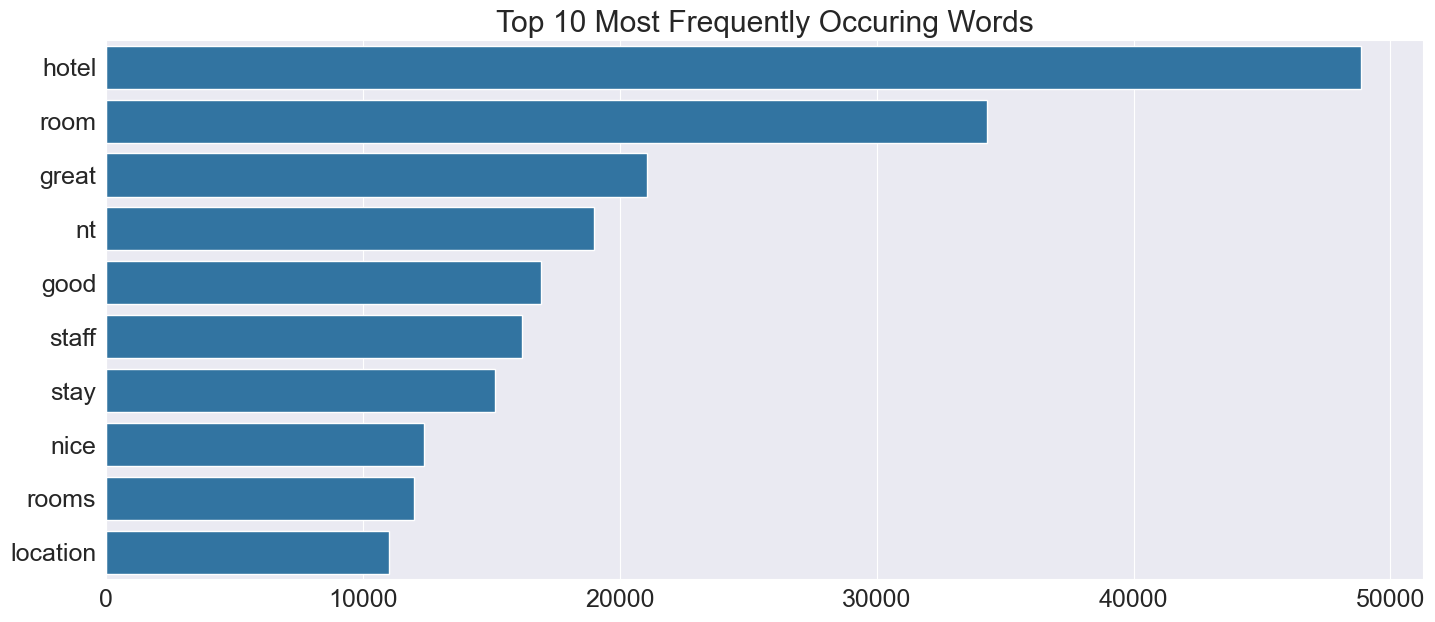

In [26]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

### Most Frequently occuring N_grams
What is an N-gram?

An n-gram is sequence of n words in a text. Most words by themselves may not present the entire context. Typically adverbs such as 'most' or 'very' are used to modify verbs and adjectives. Therefore, n-grams help analyse phrases and not just words which can lead to better insights.

A Bi-gram means two words in a sequence. 'Very good' or 'Too great'

A Tri-gram means three words in a sequence. 'How was your day' would be broken down to 'How was your' and 'was your day'.

For separating text into n-grams, we will use CountVectorizer from Sklearn

In [31]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['Review'])

In [32]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

: 

: 

### As the above code will crash on big datasets, use this below code:

In [27]:
from itertools import tee, islice

def ngrams(lst, n):
  tlst = lst
  while True:
    a, b = tee(tlst)
    l = tuple(islice(a, n))
    if len(l) == n:
      yield l
      next(b)
      tlst = b
    else:
      break

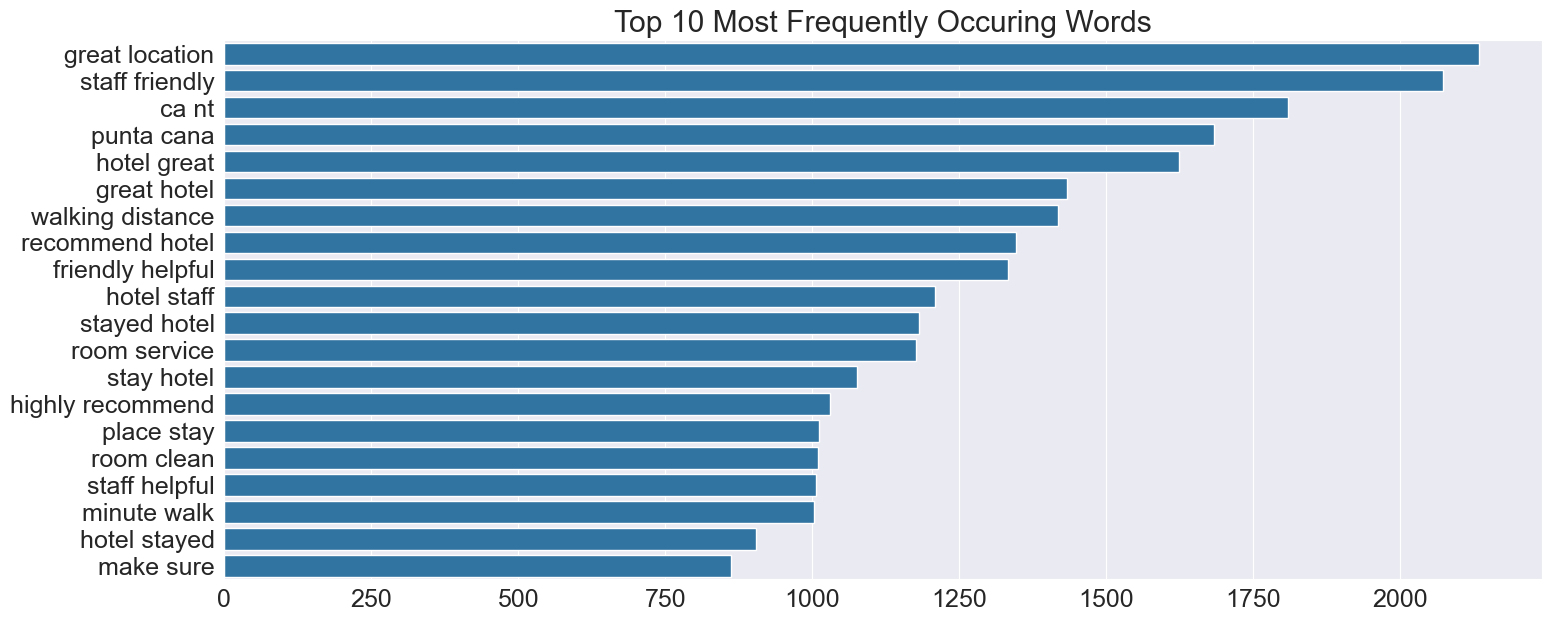

In [28]:
mostCommon = Counter(ngrams(corpus, 2)).most_common(20)
words = []
freq = []
for word, count in mostCommon:
    word = " ".join(word)
    words.append(word)
    freq.append(count)


sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

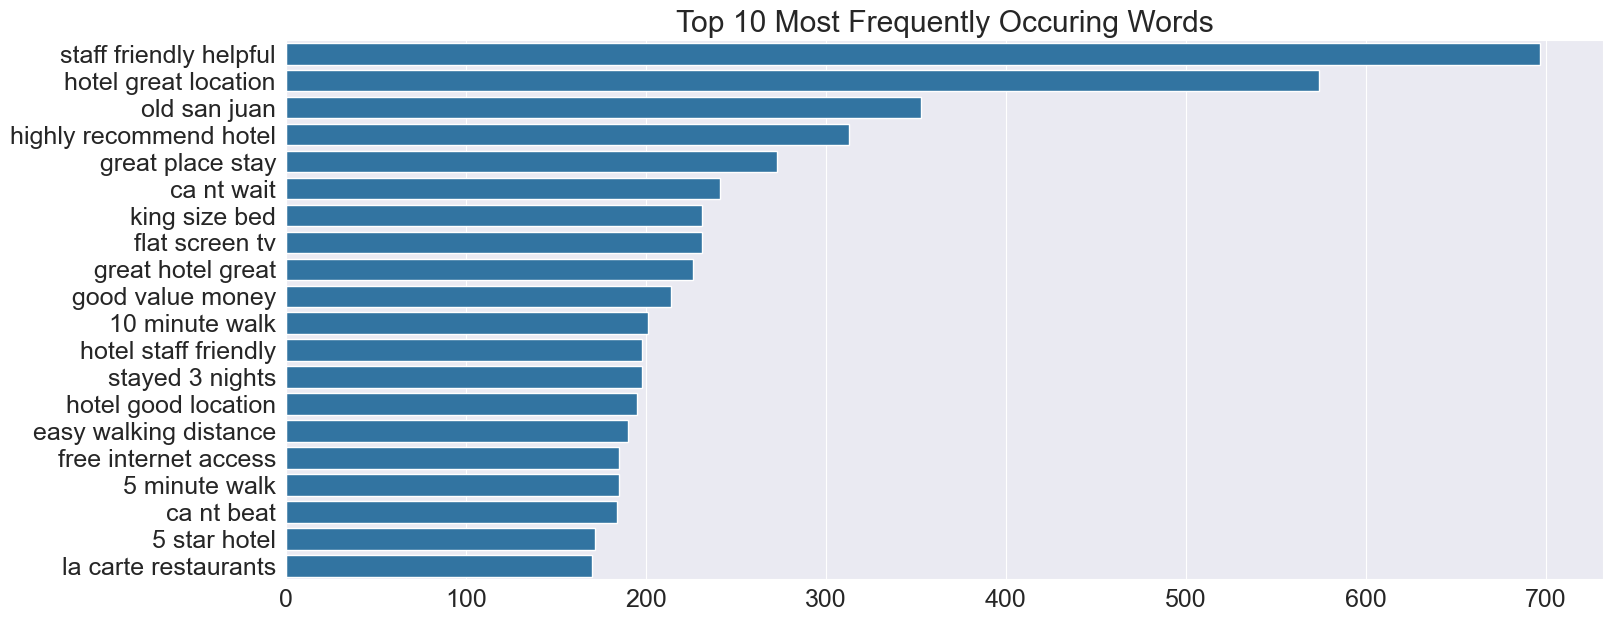

In [29]:
mostCommon = Counter(ngrams(corpus, 3)).most_common(20)
words = []
freq = []
for word, count in mostCommon:
    word = " ".join(word)
    words.append(word)
    freq.append(count)


sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()